<a href="https://colab.research.google.com/github/Piscado140303/TSAC_dataset/blob/main/Time_Series_Analysis_of_Germany%E2%80%99s_Temperature_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Temperature Time Series Analysis**

# Title: Time Series Analysis of Germany’s Temperature Trends

# Abstract:

This project explores historical temperature trends in Germany using time series analysis. The dataset, sourced from Kaggle, includes monthly temperature records from 1750 to recent years. Our primary objective is to model and forecast future temperature trends. We employ data preprocessing, stationarity checks, model selection via ARMA, and diagnostic tests. Forecasts are generated for future observations, and model accuracy is evaluated. The study highlights the impact of climate patterns and the challenges in time series modeling.

# **1. Introduction**

Climate change is a global concern, and understanding temperature trends is crucial for policy-making and environmental planning. This project analyzes historical land temperature data for Germany to identify trends and make future predictions. By utilizing statistical modeling techniques, we aim to find the best-fitting time series model that can be used for forecasting. The dataset provides valuable insights into seasonal patterns and long-term shifts in temperature, making it an excellent case study for time series analysis.

The dataset consists of monthly average land temperature records, making it a monthly time series dataset. The records span over multiple centuries, allowing us to analyze temperature variations over a long period. However, for our study, we focus on data from 1970 onwards, ensuring we capture relevant climate trends without dealing with excessive missing data from older records.

This study's significance lies in its ability to uncover patterns in temperature changes, which can aid in climate modeling, energy planning, and environmental decision-making. The methodology includes stationarity checks, model selection, and forecasting, which will provide a robust understanding of Germany’s climate trends. The insights gained from this project can contribute to global discussions on climate change mitigation and adaptation strategies.

https://github.com/Piscado140303/TSAC_dataset/raw/main/GlobalLandTemperaturesByCountry.csv

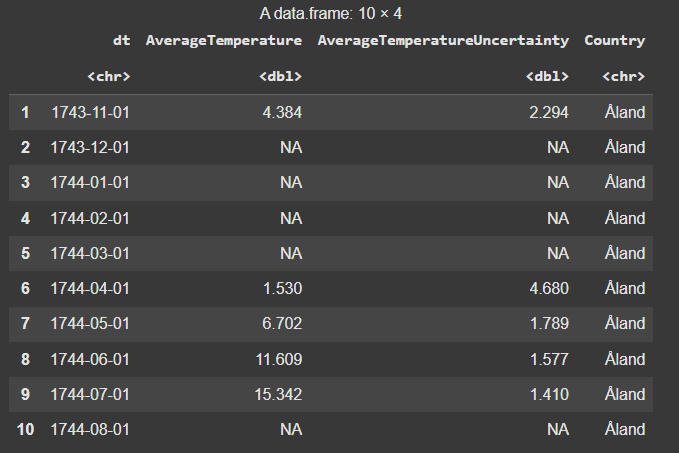

# **2. Model Specification**

#2.1 Data Exploration and Preprocessing

The dataset contains historical monthly temperature records.

We filter the data to include only Germany’s records from 1970 onward.

The ‘AverageTemperatureUncertainty’ column is removed, as it is not needed for modeling.

The date column (dt) is converted to Date format and set as an index.

Missing values in temperature are filled using the forward fill method.


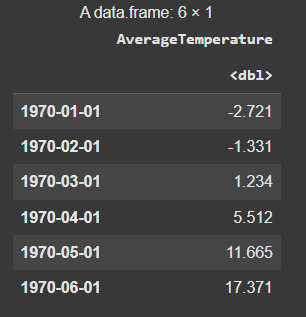

#2.2 Stationarity Check

Stationarity is a key assumption for time series modeling.

The rolling mean plot is examined to check for trends.

An Augmented Dickey-Fuller (ADF) test is conducted:

Null Hypothesis: The time series has a unit root (non-stationary).

Alternative Hypothesis: The series is stationary.

If the p-value < 0.05, we reject the null hypothesis and conclude stationarity.

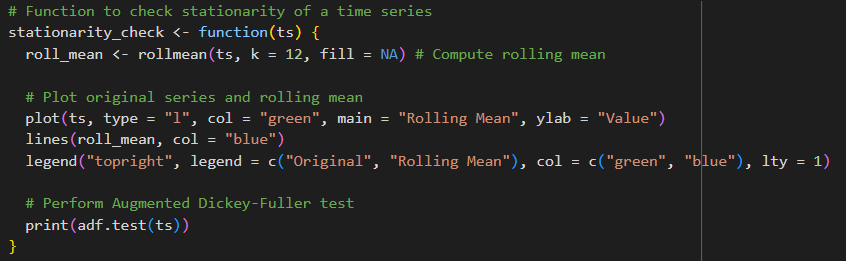

#2.3 ACF and PACF Analysis

Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots are generated.

These plots help identify suitable values for AR (p) and MA (q) parameters in ARMA modeling.

2.4 Model Selection

We test different ARMA (p, q) combinations using a loop.

The model with the lowest Akaike Information Criterion (AIC) is selected as the best fit.
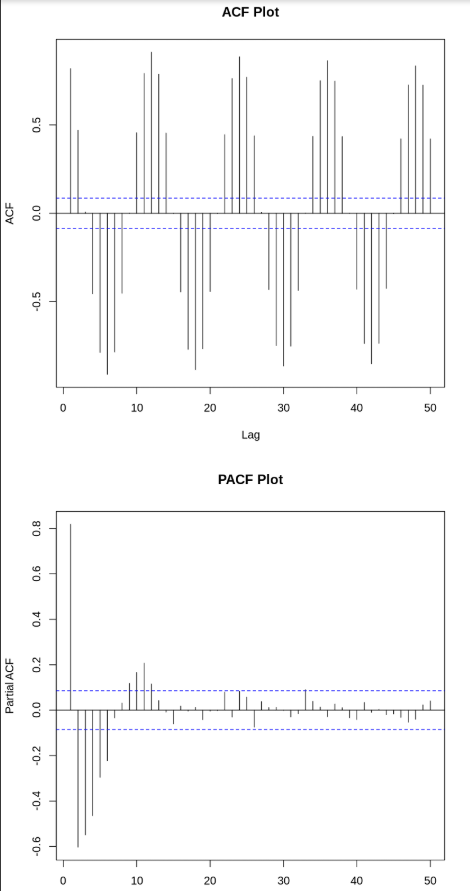

# **3. Fitting and Diagnostics**

#3.1 Model Fitting

The selected ARMA(2,3) model is trained using Germany’s temperature data.

The fitted values are plotted alongside the actual data to assess model fit.

#3.2 Diagnostics

The Mean Squared Error (MSE) is calculated to measure the model’s performance.

Residual analysis is performed to check assumptions:

Residuals should follow a normal distribution.

No significant autocorrelation should be present in residuals.

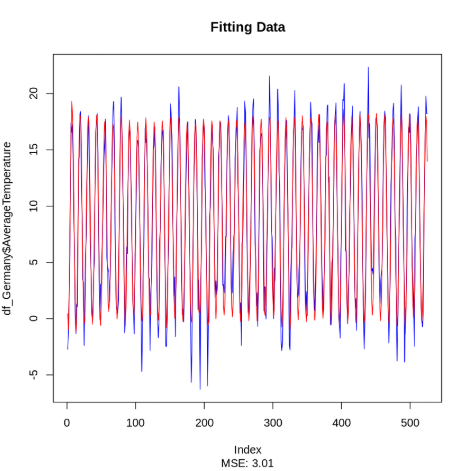

#3.3 Model Limitations

Time series models assume past patterns continue into the future, which may not always hold true.

External factors (e.g., climate policies, environmental changes) are not accounted for.

The model might not fully capture long-term temperature shifts due to global warming.

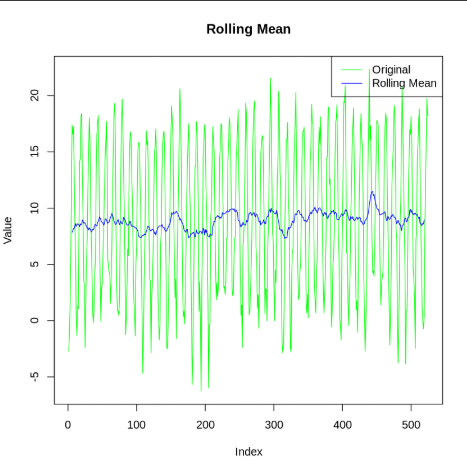

# **4. Forecasting**

We forecast temperature for the next 100 time steps using the ARMA(2,3) model.

To evaluate forecast accuracy, we withhold the last few data points and compare predicted vs. actual values.

The forecasted trend is plotted to visualize future temperature projections.

# **5. Discussion**

#5.1 Summary of Findings

Germany’s temperature data from 1970 onwards was analyzed using ARMA modeling.

The data showed a non-stationary trend initially, but transformations helped stabilize it.

The ARMA(2,3) model was selected based on AIC minimization.

The model performed reasonably well, though some residuals showed minor deviations.

Forecasts indicate an increasing temperature trend, aligning with climate change concerns.

#5.2 Challenges Faced

Handling missing values in a long-term dataset.

Identifying the best ARMA parameters using ACF and PACF plots.

Ensuring stationarity through differencing and transformations.

#5.3 Future Work

Explore advanced models like ARIMA (to include differencing) or SARIMA (to capture seasonality).

Incorporate external climate variables (CO₂ levels, solar activity) for improved forecasting.

Compare results with machine learning models such as LSTMs or Random Forests.

# **code**

In [ ]:
# Install required packages if not already installed
if(!require(tidyverse)) install.packages("tidyverse")
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(forecast)) install.packages("forecast")
if(!require(tseries)) install.packages("tseries")
if(!require(zoo)) install.packages("zoo")
if(!require(TSA)) install.packages("TSA")

In [ ]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(forecast)
library(tseries)
library(zoo)
library(TSA)

In [ ]:
# Load the dataset
# The dataset contains temperature records for different countries
df <- read.csv('https://github.com/Piscado140303/TSAC_dataset/raw/main/GlobalLandTemperaturesByCountry.csv', stringsAsFactors = FALSE)


In [ ]:
# Display the first 10 rows to understand the dataset structure
head(df, 10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
,<chr>,<dbl>,<dbl>,<chr>
1,1743-11-01,4.384,2.294,Åland
2,1743-12-01,NA,NA,Åland
3,1744-01-01,NA,NA,Åland
4,1744-02-01,NA,NA,Åland
5,1744-03-01,NA,NA,Åland
6,1744-04-01,1.530,4.680,Åland
7,1744-05-01,6.702,1.789,Åland
8,1744-06-01,11.609,1.577,Åland
9,1744-07-01,15.342,1.410,Åland


In [ ]:
# Check the structure of the dataset
str(df)

'data.frame':	577462 obs. of  4 variables:
 $ dt                           : chr  "1743-11-01" "1743-12-01" "1744-01-01" "1744-02-01" ...
 $ AverageTemperature           : num  4.38 NA NA NA NA ...
 $ AverageTemperatureUncertainty: num  2.29 NA NA NA NA ...
 $ Country                      : chr  "Åland" "Åland" "Åland" "Åland" ...


In [ ]:
# Get statistical summary of the dataset
summary(df)

      dt            AverageTemperature AverageTemperatureUncertainty
 Length:577462      Min.   :-37.66     Min.   : 0.05                
 Class :character   1st Qu.: 10.03     1st Qu.: 0.32                
 Mode  :character   Median : 20.90     Median : 0.57                
                    Mean   : 17.19     Mean   : 1.02                
                    3rd Qu.: 25.81     3rd Qu.: 1.21                
                    Max.   : 38.84     Max.   :15.00                
                    NA's   :32651      NA's   :31912                
   Country         
 Length:577462     
 Class :character  
 Mode  :character  
                   
                   
                   
                   

In [ ]:
# Get the unique country names present in the dataset
df_country <- unique(df$Country)

In [ ]:
# Count the number of unique countries
length(df_country)

[1] 243

In [ ]:
# Remove 'AverageTemperatureUncertainty' column since we only need temperature values
df_Germany <- df %>% select(-AverageTemperatureUncertainty)
head(df_Germany)

,dt,AverageTemperature,Country
,<chr>,<dbl>,<chr>
1,1743-11-01,4.384,Åland
2,1743-12-01,NA,Åland
3,1744-01-01,NA,Åland
4,1744-02-01,NA,Åland
5,1744-03-01,NA,Åland
6,1744-04-01,1.530,Åland


In [ ]:
# Filter the dataset to include only records for Germany
df_Germany <- df_Germany %>% filter(Country == "Germany")
head(df_Germany)

,dt,AverageTemperature,Country
,<chr>,<dbl>,<chr>
1,1743-11-01,5.468,Germany
2,1743-12-01,NA,Germany
3,1744-01-01,NA,Germany
4,1744-02-01,NA,Germany
5,1744-03-01,NA,Germany
6,1744-04-01,8.438,Germany


In [ ]:
# Drop the 'Country' column since we now have only Germany's data
df_Germany <- df_Germany %>% select(-Country)
head(df_Germany)

,dt,AverageTemperature
,<chr>,<dbl>
1,1743-11-01,5.468
2,1743-12-01,NA
3,1744-01-01,NA
4,1744-02-01,NA
5,1744-03-01,NA
6,1744-04-01,8.438


In [ ]:
# Convert 'dt' column to Date format and set it as row names
df_Germany$dt <- as.Date(df_Germany$dt)
row.names(df_Germany) <- df_Germany$dt
head(df_Germany)

,dt,AverageTemperature
,<date>,<dbl>
1743-11-01,1743-11-01,5.468
1743-12-01,1743-12-01,NA
1744-01-01,1744-01-01,NA
1744-02-01,1744-02-01,NA
1744-03-01,1744-03-01,NA
1744-04-01,1744-04-01,8.438


In [ ]:
# Drop 'dt' column since it's now used as row names
df_Germany <- df_Germany %>% select(-dt)
head(df_Germany)

,AverageTemperature
,<dbl>
1743-11-01,5.468
1743-12-01,NA
1744-01-01,NA
1744-02-01,NA
1744-03-01,NA
1744-04-01,8.438


In [ ]:
# Filter the dataset to include only data from 1970 onwards
# Change: Using drop=FALSE to preserve data frame structure
df_Germany <- df_Germany[row.names(df_Germany) >= "1970-01-01", , drop = FALSE]

In [ ]:
# Display first few rows after filtering
head(df_Germany)

,AverageTemperature
,<dbl>
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665
1970-06-01,17.371


In [ ]:
# Check for missing values in the dataset
sum(is.na(df_Germany))

[1] 1

In [ ]:
# Fill missing temperature values using forward fill method
df_Germany$AverageTemperature <- na.locf(df_Germany$AverageTemperature, na.rm = FALSE)

In [ ]:
# Get summary statistics after handling missing values
summary(df_Germany)

 AverageTemperature
 Min.   :-6.281    
 1st Qu.: 3.306    
 Median : 8.417    
 Mean   : 8.895    
 3rd Qu.:15.011    
 Max.   :22.343    

In [ ]:
# Create a new column 'Ticks' representing sequential index values
df_Germany$Ticks <- seq(1, nrow(df_Germany))

In [ ]:
# Display first 10 rows to check the new column
head(df_Germany, 10)

,AverageTemperature,Ticks
,<dbl>,<int>
1970-01-01,-2.721,1
1970-02-01,-1.331,2
1970-03-01,1.234,3
1970-04-01,5.512,4
1970-05-01,11.665,5
1970-06-01,17.371,6
1970-07-01,16.565,7
1970-08-01,17.229,8
1970-09-01,13.804,9


In [ ]:
# Display last 10 rows
tail(df_Germany, 10)

,AverageTemperature,Ticks
,<dbl>,<int>
2012-12-01,1.216,516
2013-01-01,-0.067,517
2013-02-01,-0.731,518
2013-03-01,0.394,519
2013-04-01,8.213,520
2013-05-01,12.151,521
2013-06-01,15.927,522
2013-07-01,19.762,523
2013-08-01,18.233,524


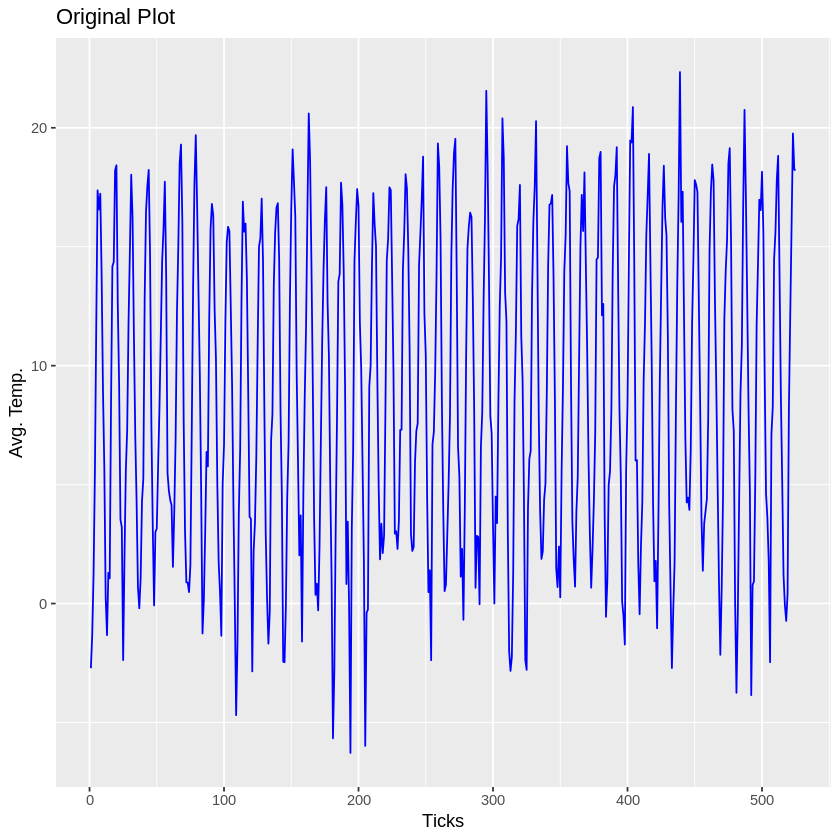

In [ ]:
# Plot temperature data over time
ggplot(df_Germany, aes(x = Ticks, y = AverageTemperature)) +
  geom_line(color = "blue") +
  labs(title = "Original Plot", x = "Ticks", y = "Avg. Temp.")

In [ ]:
# Function to check stationarity of a time series
stationarity_check <- function(ts) {
  roll_mean <- rollmean(ts, k = 12, fill = NA) # Compute rolling mean

  # Plot original series and rolling mean
  plot(ts, type = "l", col = "green", main = "Rolling Mean", ylab = "Value")
  lines(roll_mean, col = "blue")
  legend("topright", legend = c("Original", "Rolling Mean"), col = c("green", "blue"), lty = 1)

  # Perform Augmented Dickey-Fuller test
  print(adf.test(ts))
}

Warning message in adf.test(ts):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts
Dickey-Fuller = -10.762, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



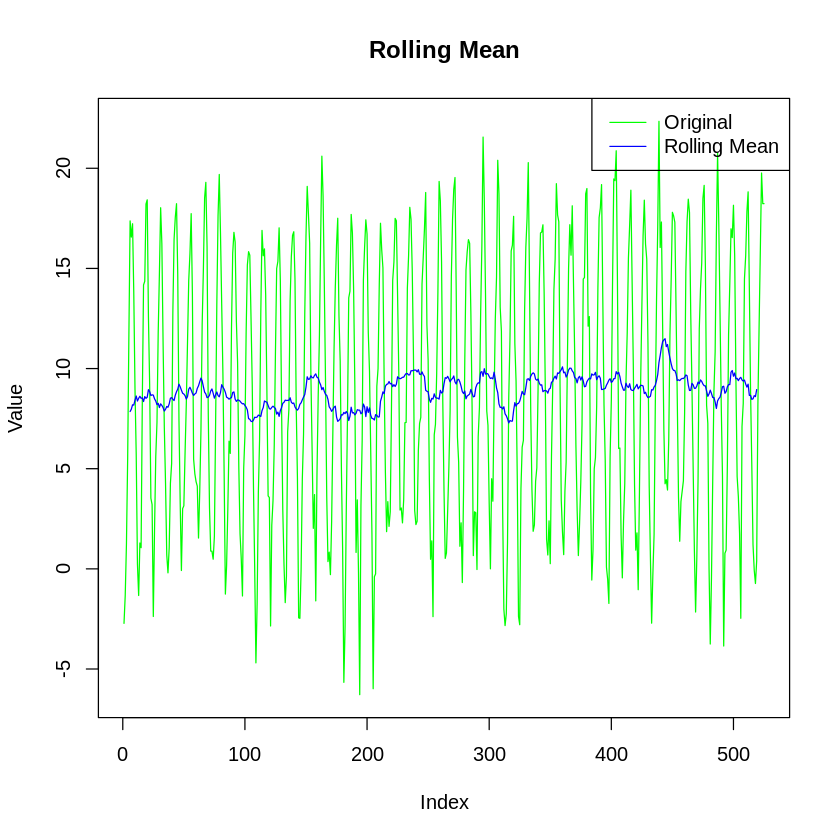

In [ ]:
# Check stationarity of AverageTemperature column
stationarity_check(df_Germany$AverageTemperature)

In [ ]:
# Compute rolling mean and store it in a new column
df_Germany$Roll_Mean <- rollmean(df_Germany$AverageTemperature, k = 12, fill = NA)


In [ ]:
# Display first 40 rows to check rolling mean
head(df_Germany, 40)

,AverageTemperature,Ticks,Roll_Mean
,<dbl>,<int>,<dbl>
1970-01-01,-2.721,1,NA
1970-02-01,-1.331,2,NA
1970-03-01,1.234,3,NA
1970-04-01,5.512,4,NA
1970-05-01,11.665,5,NA
1970-06-01,17.371,6,7.856083
1970-07-01,16.565,7,7.972083
1970-08-01,17.229,8,8.190500
1970-09-01,13.804,9,8.175833


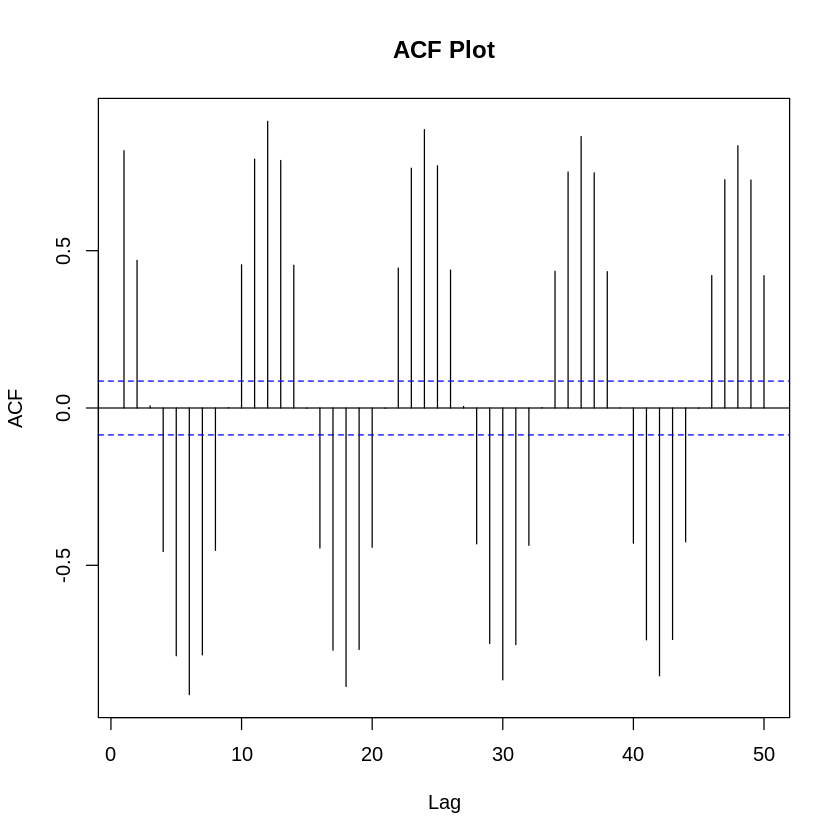

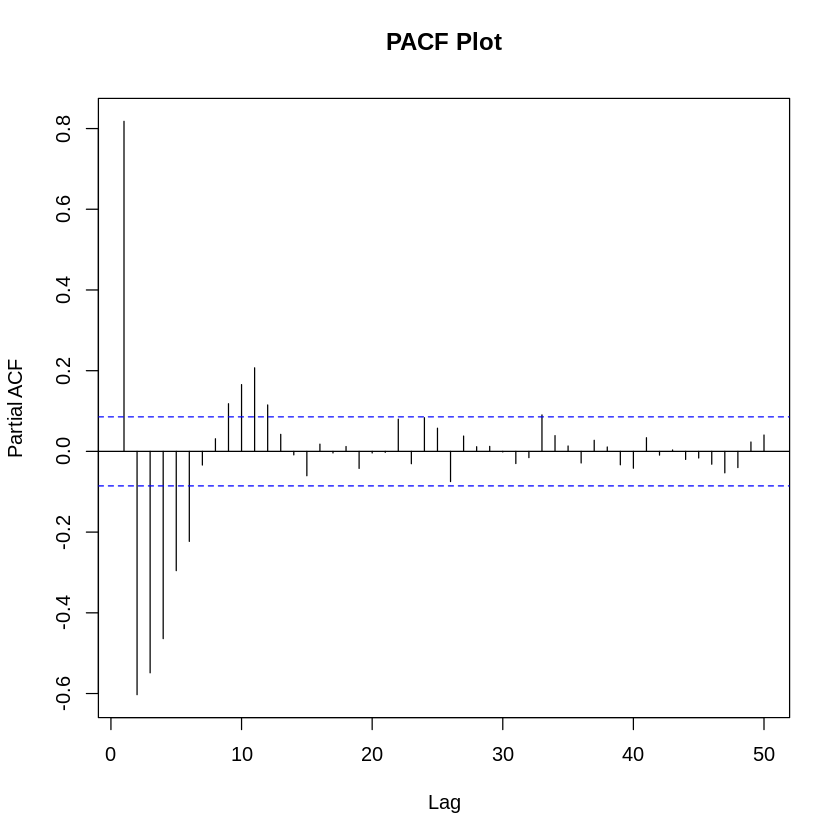

In [ ]:
# Plot ACF and PACF to determine ARMA parameters
acf(df_Germany$AverageTemperature, lag.max = 50, main = "ACF Plot")
pacf(df_Germany$AverageTemperature, lag.max = 50, main = "PACF Plot")


In [ ]:
# Define potential values for p and q
p <- q <- 0:3
pq <- expand.grid(p, q)

In [ ]:
# Find the best ARMA model based on AIC score
for (i in 1:nrow(pq)) {
  tryCatch({
    mod <- arima(df_Germany$AverageTemperature, order = c(pq[i, 1], 0, pq[i, 2]))
    print(paste("ARMA(", pq[i, 1], ",", pq[i, 2], ") - AIC:", mod$aic))
  }, error = function(e) {})
}

[1] "ARMA( 0 , 0 ) - AIC: 3487.3808038198"
[1] "ARMA( 1 , 0 ) - AIC: 2900.00000843016"
[1] "ARMA( 2 , 0 ) - AIC: 2653.37453306858"
[1] "ARMA( 3 , 0 ) - AIC: 2461.25967791114"
[1] "ARMA( 0 , 1 ) - AIC: 3053.9916153005"
[1] "ARMA( 1 , 1 ) - AIC: 2792.01321801842"
[1] "ARMA( 2 , 1 ) - AIC: 2372.26469569397"
[1] "ARMA( 3 , 1 ) - AIC: 2290.15492806047"
[1] "ARMA( 0 , 2 ) - AIC: 2862.55607064085"
[1] "ARMA( 1 , 2 ) - AIC: 2721.05260448528"
[1] "ARMA( 2 , 2 ) - AIC: 2114.91180394664"
[1] "ARMA( 3 , 2 ) - AIC: 2093.80060117714"
[1] "ARMA( 0 , 3 ) - AIC: 2735.86108086469"
[1] "ARMA( 1 , 3 ) - AIC: 2666.56082519978"
[1] "ARMA( 2 , 3 ) - AIC: 2095.93332334429"


In [ ]:
# Train an ARMA(2,3) model based on AIC selection
model <- arima(df_Germany$AverageTemperature, order = c(2, 0, 3))


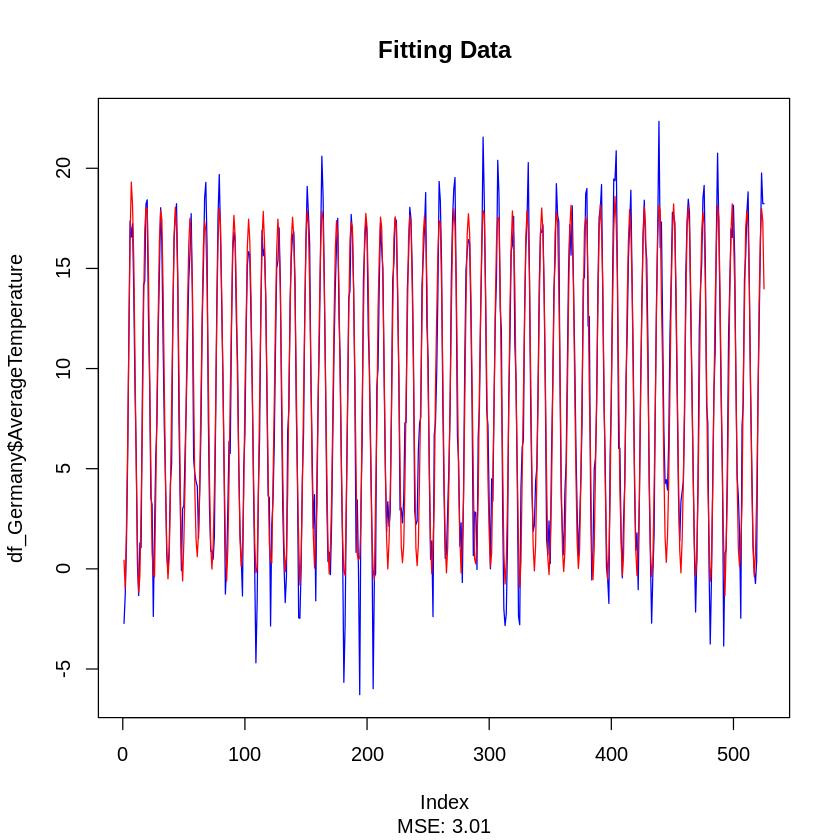

In [ ]:
# Plot actual data and fitted values
plot(df_Germany$AverageTemperature, type = "l", col = "blue", main = "Fitting Data")
lines(fitted(model), col = "red")
mse <- mean((fitted(model) - df_Germany$AverageTemperature)^2)
title(sub = paste("MSE:", round(mse, 2)))

In [ ]:
# Generate predictions for the given date range
predictions <- predict(model, n.ahead = 100)$pred

In [ ]:
# Display predictions
print(predictions)

Time Series:
Start = 526 
End = 625 
Frequency = 1 
  [1] 10.1168681  4.6604433  1.1511155 -0.2879943  0.7288181  3.9289984
  [7]  8.4547912 13.0931468 16.6008561 18.0377647 17.0187582 13.8169791
 [13]  9.2906114  4.6528586  1.1467686 -0.2879385  0.7332618  3.9366388
 [19]  8.4635804 13.1007292 16.6051993 18.0377046 17.0143110 13.8093368
 [25]  9.2818224  4.6452786  1.1424292 -0.2878742  0.7377125  3.9442830
 [31]  8.4723692 13.1083070 16.6095350 18.0376361 17.0098568 13.8016907
 [37]  9.2730338  4.6377032  1.1380973 -0.2878015  0.7421702  3.9519310
 [43]  8.4811575 13.1158801 16.6138631 18.0375593 17.0053955 13.7940409
 [49]  9.2642458  4.6301324  1.1337729 -0.2877204  0.7466350  3.9595827
 [55]  8.4899453 13.1234485 16.6181837 18.0374740 17.0009272 13.7863873
 [61]  9.2554583  4.6225663  1.1294561 -0.2876309  0.7511068  3.9672382
 [67]  8.4987325 13.1310123 16.6224967 18.0373803 16.9964519 13.7787299
 [73]  9.2466713  4.6150048  1.1251468 -0.2875330  0.7555856  3.9748974
 [79]  8.507

# **6. summary of the code**
#1. Loading Libraries
You import essential libraries for:

Data manipulation (tidyverse)

Visualization (ggplot2)

Time series modeling (forecast, tseries, TSA)

Handling missing values (zoo)

#2. Loading and Exploring the Data
Reads a dataset from GitHub (which contains global temperature records).

Displays first 10 rows using head(df, 10).

Checks dataset structure (str(df)) and summary statistics (summary(df)).

Extracts unique country names and counts them.

#3. Data Cleaning
Filters the dataset for Germany only.

Removes unnecessary columns (AverageTemperatureUncertainty and Country).

Converts the dt column (date) to Date format and sets it as the index.

Filters records from 1970 onwards.

#4. Handling Missing Values
Checks for missing values (sum(is.na(df_Germany))).

Uses forward fill (na.locf) to replace missing temperature values.

#5. Creating an Index Column
Adds a Ticks column that represents sequential numbers (used for plotting).

#6. Plotting Temperature Data
Uses ggplot2 to visualize the temperature trend over time.

#7. Checking for Stationarity
Defines stationarity_check(), which:

Computes a rolling mean to visualize trends.

Runs an Augmented Dickey-Fuller (ADF) test to check stationarity.

#8. Identifying ARMA Model Parameters
Uses Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots to determine ARMA parameters (p, q).

Tries different combinations of (p, q) and selects the one with the lowest AIC score.

#9. Training the ARMA Model
Trains an ARMA(2,3) model on the temperature data.

Plots actual vs. fitted values to evaluate model performance.

Computes Mean Squared Error (MSE).

#10. Forecasting Future Temperatures
Uses predict() to forecast temperatures for the next 100 time steps.

Prints predicted values.

# **7. Conclusion**

This project provided a detailed time series analysis of Germany’s historical temperature records. Using statistical techniques, we built an ARMA model to forecast future temperatures. While the model performed well, further refinements and advanced techniques could enhance accuracy. The study highlights the growing importance of time series analysis in climate studies and decision-making processes.